## Modelling

- [Preprocessing](#Preprocessing)
- [EDA & Modeling](#EDA-&-Modeling)
- [Evaluation and Conceptual Understanding](#Evaluation-and-Conceptual-Understanding)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
---

In [1]:
# imports:

#maths
import pandas as pd
import numpy as np
import scipy.stats as stats

#visual
import seaborn as sns
import matplotlib.pyplot as plt

#modelling
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from IPython.display import SVG
#from xgboost import XGBRegressor


#from xgboost import xgboost
#from xgboost import plot_importance

%matplotlib inline

#To visualize the whole grid
pd.options.display.max_columns = 999

plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
airbnb_df = pd.read_csv('../data/listings_cleaned.csv')

In [3]:
airbnb_df.head()

,id,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_90,instant_bookable,cancellation_policy,host_active,phone,email,id_verification,review,photo,socials,others,grouped_property_type,air_con,wifi,washer,essentials,kitchen,hangers,iron,tv,hair_dryer,shampoo,laptop_workspace,elevator,dryer,hot_water,bedroom_lock,pool,refrigerator,long_term_stays,gym,microwave
0,49091,0,2,0,Woodlands,North Region,1,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,4.430817,0.0,0.0,1,14.0,180,90,0,flexible,3417.0,1,1,1,1,1,1,1,apartment,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,50646,0,1,0,Bukit Timah,Central Region,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,4.382027,0.0,0.0,2,20.0,90,90,0,moderate,3459.0,1,1,1,1,1,1,0,apartment,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0
2,56334,0,2,0,Woodlands,North Region,1,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,4.248495,0.0,0.0,1,14.0,6,90,0,flexible,3417.0,1,1,1,1,1,1,1,apartment,1,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
3,71609,0,8,1,Tampines,East Region,1,Villa,Private room,6,1.0,2.0,3.0,Real Bed,5.332719,279.0,56.0,4,28.0,1,90,1,flexible,3316.0,1,1,0,1,0,0,1,others,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0,0
4,71896,0,8,1,Tampines,East Region,1,House,Private room,3,0.5,1.0,1.0,Real Bed,4.553877,140.0,28.0,1,21.0,1,90,1,moderate,3316.0,1,1,0,1,0,0,1,apartment,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0


In [4]:
airbnb_df_dum = pd.get_dummies(airbnb_df)

In [5]:
airbnb_df_dum

,id,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_90,instant_bookable,host_active,phone,email,id_verification,review,photo,socials,others,air_con,wifi,washer,essentials,kitchen,hangers,iron,tv,hair_dryer,shampoo,laptop_workspace,elevator,dryer,hot_water,bedroom_lock,pool,refrigerator,long_term_stays,gym,microwave,neighbourhood_cleansed_Ang Mo Kio,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,neighbourhood_cleansed_Bukit Timah,neighbourhood_cleansed_Central Water Catchment,neighbourhood_cleansed_Choa Chu Kang,neighbourhood_cleansed_Clementi,neighbourhood_cleansed_Downtown Core,neighbourhood_cleansed_Geylang,neighbourhood_cleansed_Hougang,neighbourhood_cleansed_Jurong East,neighbourhood_cleansed_Jurong West,neighbourhood_cleansed_Kallang,neighbourhood_cleansed_Lim Chu Kang,neighbourhood_cleansed_Mandai,neighbourhood_cleansed_Marina South,neighbourhood_cleansed_Marine Parade,neighbourhood_cleansed_Museum,neighbourhood_cleansed_Newton,neighbourhood_cleansed_Novena,neighbourhood_cleansed_Orchard,neighbourhood_cleansed_Outram,neighbourhood_cleansed_Pasir Ris,neighbourhood_cleansed_Pioneer,neighbourhood_cleansed_Punggol,neighbourhood_cleansed_Queenstown,neighbourhood_cleansed_River Valley,neighbourhood_cleansed_Rochor,neighbourhood_cleansed_Sembawang,neighbourhood_cleansed_Sengkang,neighbourhood_cleansed_Serangoon,neighbourhood_cleansed_Singapore River,neighbourhood_cleansed_Southern Islands,neighbourhood_cleansed_Sungei Kadut,neighbourhood_cleansed_Tampines,neighbourhood_cleansed_Tanglin,neighbourhood_cleansed_Toa Payoh,neighbourhood_cleansed_Tuas,neighbourhood_cleansed_Western Water Catchment,neighbourhood_cleansed_Woodlands,neighbourhood_cleansed_Yishun,neighbourhood_group_cleansed_Central Region,neighbourhood_group_cleansed_East Region,neighbourhood_group_cleansed_North Region,neighbourhood_group_cleansed_North-East Region,neighbourhood_group_cleansed_West Region,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Campsite,property_type_Chalet,property_type_Condominium,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Heritage hotel (India),property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,grouped_property_type_apartment,grouped_property_type_hotel,grouped_property_type_others
0,49091,0,2,0,1,1,1.0,1.0,1.0,4.430817,0.0,0.0,1,14.0,180,90,0,3417.0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0
1,50646,0,1,0,1,2,1.0,1.0,1.0,4.382027,0.0,0.0,2,20.0,90,90,0,3459.0,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
2,56334,0,2,0,1,1,1.0,1.0,1.0,4.248495,0.0,0.0,1,14.0,6,90,0,3417.0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [6]:
# Separating X and y
X = airbnb_df_dum.drop('price', axis=1)
y = airbnb_df_dum.price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [7]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

In [8]:
# Building the model
model = Sequential()

model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               17536     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 116,609
Trainable params: 116,609
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    verbose=2)


Train on 5571 samples, validate on 1857 samples
Epoch 1/100
 - 0s - loss: 5.8291 - mean_squared_error: 5.8291 - val_loss: 2.0017 - val_mean_squared_error: 2.0017
Epoch 2/100
 - 0s - loss: 1.1283 - mean_squared_error: 1.1283 - val_loss: 0.7953 - val_mean_squared_error: 0.7953
Epoch 3/100
 - 0s - loss: 0.4327 - mean_squared_error: 0.4327 - val_loss: 0.5534 - val_mean_squared_error: 0.5534
Epoch 4/100
 - 0s - loss: 0.2923 - mean_squared_error: 0.2923 - val_loss: 0.4652 - val_mean_squared_error: 0.4652
Epoch 5/100
 - 0s - loss: 0.2293 - mean_squared_error: 0.2293 - val_loss: 0.4370 - val_mean_squared_error: 0.4370
Epoch 6/100
 - 0s - loss: 0.1950 - mean_squared_error: 0.1950 - val_loss: 0.4157 - val_mean_squared_error: 0.4157
Epoch 7/100
 - 0s - loss: 0.1715 - mean_squared_error: 0.1715 - val_loss: 0.4057 - val_mean_squared_error: 0.4057
Epoch 8/100
 - 0s - loss: 0.1524 - mean_squared_error: 0.1524 - val_loss: 0.3868 - val_mean_squared_error: 0.3868
Epoch 9/100
 - 0s - loss: 0.1376 - mean

Epoch 70/100
 - 0s - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.3344 - val_mean_squared_error: 0.3344
Epoch 71/100
 - 0s - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.3290 - val_mean_squared_error: 0.3290
Epoch 72/100
 - 0s - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.3301 - val_mean_squared_error: 0.3301
Epoch 73/100
 - 0s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.3257 - val_mean_squared_error: 0.3257
Epoch 74/100
 - 0s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.3236 - val_mean_squared_error: 0.3236
Epoch 75/100
 - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.3195 - val_mean_squared_error: 0.3195
Epoch 76/100
 - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.3280 - val_mean_squared_error: 0.3280
Epoch 77/100
 - 0s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.3210 - val_mean_squared_error: 0.3210
Epoch 78/100
 - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.324

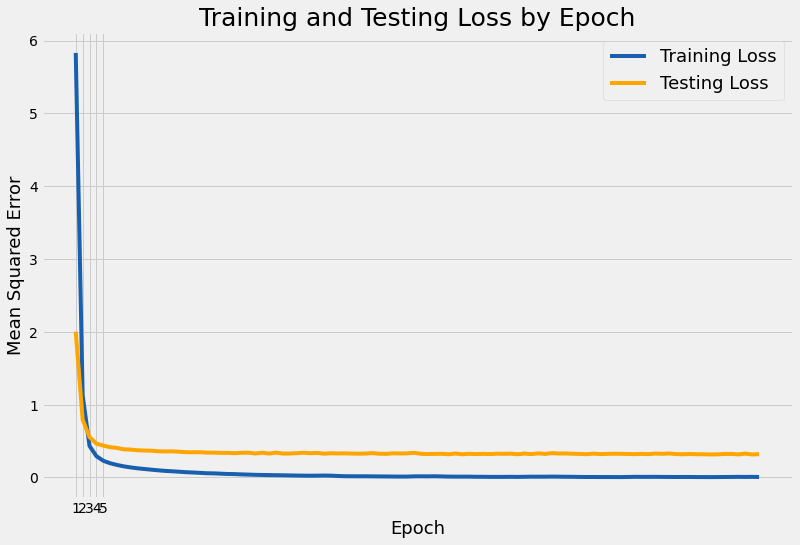

In [10]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')
# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Mean Squared Error', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);